In [1]:
#朴素贪心算法

import random

class ArmBandit():
    def __init__(self, name, probability):
        self.name = name
        self.probability = probability
        self.pull_times = 1
    
    #模拟摇臂，按照概率返回，1代表有收益，0代表没有收益
    def pull(self):
        self.pull_times += 1
        if random.random() < self.probability:
            return 1
        else:
            return 0
    
    def get_pull_times(self):
        return self.pull_times
            
    def __str__(self) -> str:
        return f"{self.name}号老虎机的概率为：{self.probability}"

#初始化老虎机概率
bandit_propability = [0.1355416916306045, 0.5939514278183152, 0.6589668115166952, 0.6755337560094611, 0.2913420268334277,
0.32445103069055126, 0.5447695432679104, 0.5142948397820707, 0.6631081989312548, 0.1570983569528034]

#老虎机个数
bandits_num = 10
#探索次数
explore_times = 100
#摇老虎机的机会
total_chance = 10000
#利用次数
exploit_times = total_chance - bandits_num * explore_times

#构造老虎机实例
bandits = []
for x in range(bandits_num):
    bandits.append(ArmBandit(x, bandit_propability[x]))

#每个老虎机探索一定的次数
bandits_result = {}
for bandit in bandits:
    profit = 0
    for _ in range(explore_times):
        profit += bandit.pull()
    bandits_result[bandit] = profit

#计算赢钱概率最高的老虎机，每个老虎机的探索次数相等，所以赢钱的概率只要比较收益大小就行
max_bandit = None
max_profit = 0
total_profit = 0

for bandit, profit in bandits_result.items():
    print(f"{bandit}，摇{explore_times}次收益为：{profit}")
    if max_profit < profit:
        max_profit = profit
        max_bandit = bandit
        total_profit += profit

#最后把剩下的机会都留给赢钱概率最高的老虎机
print(f"收益最高的估算是：{max_bandit}")
exploit_profit = 0
for _ in range(exploit_times):
    exploit_profit += max_bandit.pull()

total_profit += exploit_profit

print("最终收益：%d" % total_profit)

0号老虎机的概率为：0.1355416916306045，摇100次收益为：17
1号老虎机的概率为：0.5939514278183152，摇100次收益为：63
2号老虎机的概率为：0.6589668115166952，摇100次收益为：66
3号老虎机的概率为：0.6755337560094611，摇100次收益为：68
4号老虎机的概率为：0.2913420268334277，摇100次收益为：34
5号老虎机的概率为：0.32445103069055126，摇100次收益为：39
6号老虎机的概率为：0.5447695432679104，摇100次收益为：53
7号老虎机的概率为：0.5142948397820707，摇100次收益为：52
8号老虎机的概率为：0.6631081989312548，摇100次收益为：61
9号老虎机的概率为：0.1570983569528034，摇100次收益为：8
收益最高的估算是：3号老虎机的概率为：0.6755337560094611
最终收益：6300


In [2]:
#Epsilon 贪心算法

import random

class ArmBandit():
    def __init__(self, name, probability):
        self.name = name
        self.probability = probability
        self.pull_times = 1
        self.profit = 0
    
    #模拟摇臂，按照概率返回，1代表有收益，0代表没有收益
    def pull(self):
        self.pull_times += 1
        if random.random() < self.probability:
            self.profit += 1
            return 1
        else:
            return 0
    
    def get_pull_times(self):
        return self.pull_times
    
    def __str__(self) -> str:
        return f"{self.name}号老虎机的概率为：{self.probability}"

#初始化老虎机概率
bandit_propability = [0.1355416916306045, 0.5939514278183152, 0.6589668115166952, 0.6755337560094611, 0.2913420268334277,
0.32445103069055126, 0.5447695432679104, 0.5142948397820707, 0.6631081989312548, 0.1570983569528034]

#老虎机个数
bandits_num = 10
#探索次数
epsilon = 0.01
#摇老虎机的机会
total_chance = 10000

#构造老虎机实例
bandits = []
for x in range(bandits_num):
    bandits.append(ArmBandit(x, bandit_propability[x]))

#初始化老虎机收益
bandits_result = {}
for bandit in bandits:
    bandits_result[bandit] = 0

#获取当前赢钱概率最高的老虎机
def get_max_profit_bandit():
    max_bandit = bandits[0]
    max_profit = 0
    for bandit, profit in bandits_result.items():
        #遍历比较
        if (max_profit / max_bandit.get_pull_times()) < (profit / bandit.get_pull_times()):
            max_profit = profit
            max_bandit = bandit
    return max_bandit

total_profit = 0
for _ in range(total_chance):
    if random.random() < epsilon:
        #概率小于epsilon，随机选一个老虎机
        random_bandit = bandits[random.randint(0, 9)]
        random_bandit_profit = bandits_result[random_bandit]
        random_bandit_profit += random_bandit.pull()
        #更新收益
        bandits_result[random_bandit] = random_bandit_profit
    else:
        #概率大于等于epsilon，选赢钱概率最大的
        max_profit_bandit = get_max_profit_bandit()
        max_bandit_profit = bandits_result[max_profit_bandit]
        max_bandit_profit += max_profit_bandit.pull()
        #更新收益
        bandits_result[max_profit_bandit] = max_bandit_profit

for bandit, profit in bandits_result.items():
    print(f"{bandit}，收益为：{profit}")
    total_profit += profit

print("最终收益：%d" % total_profit)

0号老虎机的概率为：0.1355416916306045，收益为：47
1号老虎机的概率为：0.5939514278183152，收益为：1796
2号老虎机的概率为：0.6589668115166952，收益为：15
3号老虎机的概率为：0.6755337560094611，收益为：4298
4号老虎机的概率为：0.2913420268334277，收益为：6
5号老虎机的概率为：0.32445103069055126，收益为：3
6号老虎机的概率为：0.5447695432679104，收益为：28
7号老虎机的概率为：0.5142948397820707，收益为：3
8号老虎机的概率为：0.6631081989312548，收益为：8
9号老虎机的概率为：0.1570983569528034，收益为：2
最终收益：6206


In [3]:
#UCB算法

import math
import cmath
import random

class ArmBandit():
    def __init__(self, name, probability):
        self.name = name
        self.probability = probability
        self.pull_times = 1
        self.profit = 0
    
    #模拟摇臂，按照概率返回，1代表有收益，0代表没有收益
    def pull(self):
        self.pull_times += 1
        if random.random() < self.probability:
            self.profit += 1
            return 1
        else:
            return 0
    
    def get_pull_times(self):
        return self.pull_times
    
    def get_profit(self):
        return self.profit
    
    def get_ucb_score(self, currentTotalTimes):
        probability = (self.profit / self.pull_times)
        ucb = ((2 * math.log(currentTotalTimes)) / self.pull_times) ** 0.5
        return probability + ucb
            
    def __str__(self) -> str:
        return f"{self.name}号老虎机的概率为：{self.probability}，收益为：{self.profit}，被选择次数为：{self.pull_times}"

#初始化老虎机概率
bandit_propability = [0.1355416916306045, 0.5939514278183152, 0.6589668115166952, 0.6755337560094611, 0.2913420268334277,
0.32445103069055126, 0.5447695432679104, 0.5142948397820707, 0.6631081989312548, 0.1570983569528034]
#摇老虎机的机会
total_chance = 10000
#老虎机个数
bandits_num = 10
#构造老虎机实例
bandits = []
for x in range(bandits_num):
    bandits.append(ArmBandit(x, bandit_propability[x]))

def get_max_profit_bandit(currentTotalTimes):
    max_bandit = bandits[0]
    for bandit in bandits:
        if max_bandit.get_ucb_score(currentTotalTimes) < bandit.get_ucb_score(currentTotalTimes):
            max_bandit = bandit
    return max_bandit

for i in range(total_chance):
    #这里注意log0是非法的，要加1
    max_bandit = get_max_profit_bandit(i + 1)
    max_bandit.pull()

total_profit = 0
for bandit in bandits:
    total_profit += bandit.get_profit()
    print(bandit)

print("最终收益：%d" % total_profit)

0号老虎机的概率为：0.1355416916306045，收益为：3，被选择次数为：41
1号老虎机的概率为：0.5939514278183152，收益为：740，被选择次数为：1195
2号老虎机的概率为：0.6589668115166952，收益为：1421，被选择次数为：2181
3号老虎机的概率为：0.6755337560094611，收益为：1856，被选择次数为：2789
4号老虎机的概率为：0.2913420268334277，收益为：30，被选择次数为：98
5号老虎机的概率为：0.32445103069055126，收益为：34，被选择次数为：105
6号老虎机的概率为：0.5447695432679104，收益为：259，被选择次数为：474
7号老虎机的概率为：0.5142948397820707，收益为：256，被选择次数为：470
8号老虎机的概率为：0.6631081989312548，收益为：1710，被选择次数为：2595
9号老虎机的概率为：0.1570983569528034，收益为：12，被选择次数为：62
最终收益：6321


In [4]:
#汤普森采样算法

import math
import cmath
import random
from scipy.stats import beta

class ArmBandit():
    def __init__(self, name, probability):
        self.name = name
        self.probability = probability
        self.pull_times = 2
        self.profit = 1
    
    #模拟摇臂，按照概率返回，1代表有收益，0代表没有收益
    def pull(self):
        self.pull_times += 1
        if random.random() < self.probability:
            self.profit += 1
            return 1
        else:
            return 0
    
    def get_pull_times(self):
        return self.pull_times
    
    def get_profit(self):
        return self.profit
    
    def get_ucb_score(self, currentTotalTimes):
        probability = (self.profit / self.pull_times)
        ucb = ((2 * math.log(currentTotalTimes)) / self.pull_times) ** 0.5
        return probability + ucb
    
    def get_thompson_sampling_socre(self):
        # 初始的profit是1，pull_times是2，所以初始的α是1，β是1
        return beta.rvs(self.profit, self.pull_times - self.profit)
            
    def __str__(self) -> str:
        return f"{self.name}号老虎机的概率为：{self.probability}，收益为：{self.profit}，被选择次数为：{self.pull_times}"

#初始化老虎机概率
bandit_propability = [0.1355416916306045, 0.5939514278183152, 0.6589668115166952, 0.6755337560094611, 0.2913420268334277,
0.32445103069055126, 0.5447695432679104, 0.5142948397820707, 0.6631081989312548, 0.1570983569528034]
#摇老虎机的机会
total_chance = 10000
#老虎机个数
bandits_num = 10
#构造老虎机实例
bandits = []
for x in range(bandits_num):
    bandits.append(ArmBandit(x, bandit_propability[x]))

def get_max_profit_bandit():
    max_bandit = bandits[0]
    for bandit in bandits:
        if max_bandit.get_thompson_sampling_socre() < bandit.get_thompson_sampling_socre():
            max_bandit = bandit
    return max_bandit

for i in range(total_chance):
    max_bandit = get_max_profit_bandit()
    max_bandit.pull()

total_profit = 0
for bandit in bandits:
    total_profit += bandit.get_profit()
    print(bandit)

print("最终收益：%d" % total_profit)

0号老虎机的概率为：0.1355416916306045，收益为：1，被选择次数为：3
1号老虎机的概率为：0.5939514278183152，收益为：17，被选择次数为：28
2号老虎机的概率为：0.6589668115166952，收益为：769，被选择次数为：1161
3号老虎机的概率为：0.6755337560094611，收益为：3172，被选择次数为：4677
4号老虎机的概率为：0.2913420268334277，收益为：1，被选择次数为：4
5号老虎机的概率为：0.32445103069055126，收益为：1，被选择次数为：4
6号老虎机的概率为：0.5447695432679104，收益为：11，被选择次数为：25
7号老虎机的概率为：0.5142948397820707，收益为：43，被选择次数为：79
8号老虎机的概率为：0.6631081989312548，收益为：2653，被选择次数为：3999
9号老虎机的概率为：0.1570983569528034，收益为：11，被选择次数为：40
最终收益：6679


In [5]:
from scipy.stats import beta

print(beta.rvs(2, 5, size=100))

[0.09895947 0.25645334 0.08864774 0.17936682 0.45434876 0.43924997
 0.32064492 0.22511244 0.04174706 0.36490987 0.22332108 0.19344896
 0.07695594 0.13478778 0.17918856 0.23961433 0.39192477 0.38071528
 0.38319664 0.22382783 0.34120905 0.12668007 0.20641148 0.1995584
 0.05974755 0.20579119 0.0830049  0.20328871 0.49237524 0.45040565
 0.04827015 0.45352033 0.20427916 0.29231485 0.22134926 0.54442709
 0.24994008 0.05413715 0.24265513 0.37285222 0.08218542 0.11560572
 0.50615578 0.04062659 0.33326121 0.4013171  0.40055472 0.19531336
 0.36374882 0.09722718 0.612031   0.36411632 0.48467537 0.39308225
 0.09123193 0.13205766 0.22353674 0.37256632 0.2319762  0.21624017
 0.64876262 0.48812097 0.18512293 0.26608286 0.0272029  0.26665316
 0.44643141 0.46437595 0.58271691 0.13069826 0.43763116 0.21205061
 0.26727938 0.36713158 0.11938794 0.01030997 0.38295233 0.12043356
 0.61767697 0.21615797 0.20918447 0.25314756 0.29271106 0.53047094
 0.37734482 0.06426722 0.31505529 0.31673096 0.43060107 0.23842

In [6]:
#使用Beta分布最大后验概率打分

import math
import cmath
import random
from scipy.stats import beta

class ArmBandit():
    def __init__(self, name, probability):
        self.name = name
        self.probability = probability
        self.pull_times = 4
        self.profit = 2
    
    #模拟摇臂，按照概率返回，1代表有收益，0代表没有收益
    def pull(self):
        self.pull_times += 1
        if random.random() < self.probability:
            self.profit += 1
            return 1
        else:
            return 0
    
    def get_pull_times(self):
        return self.pull_times
    
    def get_profit(self):
        return self.profit
    
    def get_ucb_score(self, currentTotalTimes):
        probability = (self.profit / self.pull_times)
        ucb = ((2 * math.log(currentTotalTimes)) / self.pull_times) ** 0.5
        return probability + ucb
    
    def get_thompson_sampling_socre(self):
        # 初始的profit是2，pull_times是4，所以初始的α是2，β是2
        return (self.profit - 1) / (self.pull_times - 2)
            
    def __str__(self) -> str:
        return f"{self.name}号老虎机的概率为：{self.probability}，收益为：{self.profit}，被选择次数为：{self.pull_times}"

#初始化老虎机概率
bandit_propability = [0.1355416916306045, 0.5939514278183152, 0.6589668115166952, 0.6755337560094611, 0.2913420268334277,
0.32445103069055126, 0.5447695432679104, 0.5142948397820707, 0.6631081989312548, 0.1570983569528034]
#摇老虎机的机会
total_chance = 10000
#老虎机个数
bandits_num = 10
#构造老虎机实例
bandits = []
for x in range(bandits_num):
    bandits.append(ArmBandit(x, bandit_propability[x]))

def get_max_profit_bandit():
    max_bandit = bandits[0]
    for bandit in bandits:
        if max_bandit.get_thompson_sampling_socre() < bandit.get_thompson_sampling_socre():
            max_bandit = bandit
    return max_bandit

for i in range(total_chance):
    max_bandit = get_max_profit_bandit()
    max_bandit.pull()

total_profit = 0
for bandit in bandits:
    total_profit += bandit.get_profit()
    print(bandit)

print("最终收益：%d" % total_profit)

0号老虎机的概率为：0.1355416916306045，收益为：2，被选择次数为：5
1号老虎机的概率为：0.5939514278183152，收益为：5987，被选择次数为：10003
2号老虎机的概率为：0.6589668115166952，收益为：2，被选择次数为：4
3号老虎机的概率为：0.6755337560094611，收益为：2，被选择次数为：4
4号老虎机的概率为：0.2913420268334277，收益为：2，被选择次数为：4
5号老虎机的概率为：0.32445103069055126，收益为：2，被选择次数为：4
6号老虎机的概率为：0.5447695432679104，收益为：2，被选择次数为：4
7号老虎机的概率为：0.5142948397820707，收益为：2，被选择次数为：4
8号老虎机的概率为：0.6631081989312548，收益为：2，被选择次数为：4
9号老虎机的概率为：0.1570983569528034，收益为：2，被选择次数为：4
最终收益：6005


[2, 5]
[10, 90]
[30, 70]
[1, 1]


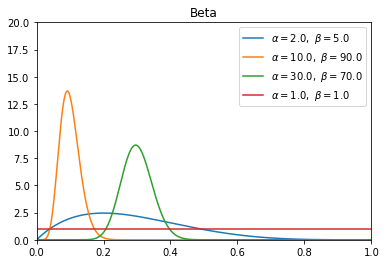

In [8]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plot

# 定义一组alpha 跟 beta值
alpha_beta_values = [[2, 5], [10, 90], [30, 70], [1, 1]]
linestyles = []

# 定义 x 值
x = np.linspace(0, 1, 1002)[1:-1]
for alpha_beta_value in alpha_beta_values:
  print(alpha_beta_value)
  dist = beta(alpha_beta_value[0], alpha_beta_value[1])
  dist_y = dist.pdf(x)
  # 添加图例
  plot.legend('alpha=')
  # 创建 beta 曲线
  plot.plot(x, dist_y, label=r'$\alpha=%.1f,\ \beta=%.1f$' % (alpha_beta_value[0], alpha_beta_value[1]))

# 设置标题
plot.title(u'Beta')
# 设置 x,y 轴取值范围
plot.xlim(0, 1)
plot.ylim(0, 20)
plot.legend()
plot.show()